In [1]:
import argparse  
# from code_part1 import foo
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [179]:
import math


def getNpArr(data):
    """
    Extract data from dataframe converted to a numpy array
    """
    N = len(data)
    tot_data_X = np.random.randn(N, 4)
    tot_data_y = np.random.randn(N, 1)
    for i in range(N):
        if (len(data[i])>1):
            tot_data_y[i][0] = float(data[i][1])
        temp = data[i][0].split('/')
#         tot_data_X[i][0] = (float(temp[0])-6.5)/math.sqrt(143/12) # Normalizing for better convergence
        tot_data_X[i][1] = (float(temp[2])-9.5) # Centering around 0 #Year
        tot_data_X[i][2] = (float(temp[0])-6.5) # centering around 0 #Month
        tot_data_X[i][0] = (float(temp[2]))/31.0 # Getting values roughly from 0 to 1 #Day
        tot_data_X[i][0] = tot_data_X[i][0]+tot_data_X[i][2] #sort of creates a linearity in dates
        tot_data_X[i][3] = (float(temp[2]) - 1)/30.0
        
    return tot_data_X, tot_data_y

# Load our data
df = pd.read_csv("2 Train.csv", header=None)
df = df[1:].sample(n = len(df)-1)
train_data = np.array(df.values)[:100]
dev_data = np.array(df.values)[100:]
train_X, train_y = getNpArr(train_data)
dev_X, dev_y = getNpArr(dev_data)

df = pd.read_csv("2 Test.csv", header=None)
df = df[1:]
test_data = np.array(df.values)
test_X, _ = getNpArr(test_data)

In [ ]:
################ ADDED 2 MORE COLUMNS FOR DATE AND MONTH INDI ###################3
####### Changes in extraction, X_fin and eye()

M=np.arange(2, 11, 1) ##Changes over the DATE column
N=np.arange(2, 6, 1) ##Changes over the YEAR column
lmm=np.logspace(-5, 1, num=7)

figure, axes = plt.subplots(nrows=len(M), ncols=len(N), figsize=(20,20))

train_date = train_X[:,0]
train_year = train_X[:,1]
test_date = test_X[:,0]
test_year = test_X[:,1]
dev_date = dev_X[:,0]
dev_year = dev_X[:,1]


# To be able to create down matrix iteratively inside the loops
X_new_train_year = train_year
temp_X_train_year = train_year

X_new_dev_year = dev_year
temp_X_dev_year = dev_year

X_new_test_year = test_year
temp_X_test_year = test_year

for idxn, n in enumerate(N): ##YEAR
    temp_X_train_year = temp_X_train_year*train_year
    X_new_train_year = np.c_[X_new_train_year, temp_X_train_year]

    temp_X_dev_year = temp_X_dev_year*dev_year
    X_new_dev_year = np.c_[X_new_dev_year, temp_X_dev_year]

    temp_X_test_year = temp_X_test_year*test_year
    X_new_test_year = np.c_[X_new_test_year, temp_X_test_year]

#     X_fin_train = np.c_[np.ones((len(X_new_train), 1)), X_new_train]    
    
    X_new_train_date = train_date
    temp_X_train_date = train_date
    X_new_dev_date = dev_date
    temp_X_dev_date = dev_date
    X_new_test_date = test_date
    temp_X_test_date = test_date

    
    for idxm, m in enumerate(M): ##DATE
        temp_X_train_date = temp_X_train_date*train_date
        X_new_train_date = np.c_[X_new_train_date, temp_X_train_date]

        temp_X_dev_date = temp_X_dev_date*dev_date
        X_new_dev_date = np.c_[X_new_dev_date, temp_X_dev_date]

        temp_X_test_date = temp_X_test_date*test_date
        X_new_test_date = np.c_[X_new_test_date, temp_X_test_date]

        E_train = []
        E_dev = []
        
        for lamb in lmm:
            X_fin_train = np.c_[np.ones((len(train_X), 1)), X_new_train_year, X_new_train_date, train_X[:,2], train_X[:,3]]    

            X_fin_dev = np.c_[np.ones((len(dev_X), 1)), X_new_dev_year, X_new_dev_date, dev_X[:,2], dev_X[:,3]]    

            X_fin_test = np.c_[np.ones((len(test_X), 1)), X_new_test_year, X_new_test_date, test_X[:,2], test_X[:,3]]    

            theta_best = np.linalg.inv((lamb*np.identity(n+m+3)) + X_fin_train.T.dot(X_fin_train)).dot(X_fin_train.T).dot(train_y)

            y_hat_train = X_fin_train.dot(theta_best)
            err  = sum((y_hat_train-train_y)**2)
            err/=len(y_hat_train)
            #print("Train error for M=%s: "%(m), math.sqrt(err))
            E_train.append(err)

            y_hat_dev = X_fin_dev.dot(theta_best)
            err  = sum((y_hat_dev-dev_y)**2)
            err/=len(y_hat_dev)
            #print("Test error for M=%s: "%(m), math.sqrt(err))
            E_dev.append(err)
        axes[idxm, idxn].plot(lmm, E_train, color='b')
        axes[idxm, idxn].plot(lmm, E_dev, color='r')
        axes[idxm, idxn].set_xscale("log")
        axes[idxm, idxn].set_xticks(lmm)
        axes[idxm, idxn].set_yticks(np.arange(0,20,2))
        axes[idxm, idxn].grid()

# plt.savefig('part_2dayMonth2_10year2_5.png')
plt.show()

### Code for adding polynomial form of column month^x.year^y

In [ ]:

M=np.arange(2, 5, 1) ##DATE
N=np.arange(2, 6, 1) ##YEAR
# lmm=np.logspace(-5, 1, num=7)
lamb = 1

Mm=np.arange(2, 10, 1) ##DATE
Nn=np.arange(2, 10, 1) ##YEAR

# figure, axes = plt.subplots(nrows=len(Mm), ncols=len(Nn), figsize=(20,20))

train_date = train_X[:,0]
train_year = train_X[:,1]
test_date = test_X[:,0]
test_year = test_X[:,1]
dev_date = dev_X[:,0]
dev_year = dev_X[:,1]


X_new_train_year = train_year
temp_X_train_year = train_year
X_new_train_date = train_date
temp_X_train_date = train_date    

X_new_dev_year = dev_year
temp_X_dev_year = dev_year
X_new_dev_date = dev_date
temp_X_dev_date = dev_date

X_new_test_date = test_date
temp_X_test_date = test_date
X_new_test_year = test_year
temp_X_test_year = test_year

for idxn, n in enumerate(N): ##YEAR
    temp_X_train_year = temp_X_train_year*train_year
    mini = np.min(temp_X_train_year)
    maxi = np.max(temp_X_train_year)
    temp_X_train_year = (temp_X_train_year - mini)/(maxi-mini)
    meani = np.mean(temp_X_train_year)
    temp_X_train_year = temp_X_train_year - meani
    X_new_train_year = np.c_[X_new_train_year, temp_X_train_year]

    temp_X_dev_year = temp_X_dev_year*dev_year
    temp_X_dev_year = (temp_X_dev_year-mini)/(maxi-mini) - meani
    X_new_dev_year = np.c_[X_new_dev_year, temp_X_dev_year]

    temp_X_test_year = temp_X_test_year*test_year
    temp_X_test_year = (temp_X_test_year - mini)/(maxi-mini) - meani
    X_new_test_year = np.c_[X_new_test_year, temp_X_test_year]

#     X_fin_train = np.c_[np.ones((len(X_new_train), 1)), X_new_train]    

good_pairs = {}

for idxm, m in enumerate(M): ##DATE
    temp_X_train_date = temp_X_train_date*train_date
    mini = np.min(temp_X_train_date)
    maxi = np.max(temp_X_train_date)
    temp_X_train_date = (temp_X_train_date - mini)/(maxi-mini)
    meani = np.mean(temp_X_train_date)
    X_new_train_date = np.c_[X_new_train_date, temp_X_train_date]

    temp_X_dev_date = temp_X_dev_date*dev_date
    temp_X_dev_date = (temp_X_dev_date-mini)/(maxi-mini) - meani
    X_new_dev_date = np.c_[X_new_dev_date, temp_X_dev_date]

    temp_X_test_date = temp_X_test_date*test_date
    temp_X_test_date = (temp_X_test_date - mini)/(maxi-mini) - meani
    X_new_test_date = np.c_[X_new_test_date, temp_X_test_date]

newc_X_train = train_year*train_date
newc_X_test = test_year*test_date
newc_X_dev = dev_year*dev_date

base_X_train = train_year*train_date
base_X_test = test_year*test_date
base_X_dev = dev_year*dev_date


    
for idxm, mm in enumerate(Mm): #Date
    
    newc_X_train = base_X_train*train_date
    mini = np.min(newc_X_train)
    maxi = np.max(newc_X_train)
    newc_X_train = (newc_X_train - mini)/(maxi-mini)
    meani = np.mean(newc_X_train)
    
    newc_X_test = base_X_test*test_date
    newc_X_test = (newc_X_test-mini)/(maxi-mini) - meani
    newc_X_dev = base_X_dev*dev_date
    newc_X_dev = (newc_X_dev-mini)/(maxi-mini) - meani
    
    base_X_train = newc_X_train
    base_X_test = newc_X_test
    base_X_dev = newc_X_dev
    
    for idxn, nn in enumerate(Nn): #Year
        newc_X_train = newc_X_train*train_year
        mini = np.min(newc_X_train)
        maxi = np.max(newc_X_train)
        newc_X_train = (newc_X_train - mini)/(maxi-mini)
        meani = np.mean(newc_X_train)
        
        newc_X_test = newc_X_test*test_year
        newc_X_test = (newc_X_test-mini)/(maxi-mini) - meani
        newc_X_dev = newc_X_dev*dev_year
        newc_X_dev = (newc_X_dev-mini)/(maxi-mini) - meani

        X_fin_train = np.c_[np.ones((len(train_X), 1)), X_new_train_year, X_new_train_date, newc_X_train, train_X[:,2], train_X[:,3]]    
        X_fin_dev = np.c_[np.ones((len(dev_X), 1)), X_new_dev_year, X_new_dev_date, newc_X_dev, dev_X[:,2], dev_X[:,3]]    
        X_fin_test = np.c_[np.ones((len(test_X), 1)), X_new_test_year, X_new_test_date, newc_X_test, test_X[:,2], test_X[:,3]]    

        theta_best = np.linalg.inv((lamb*np.identity(n+m+4)) + X_fin_train.T.dot(X_fin_train)).dot(X_fin_train.T).dot(train_y)

        y_hat_train = X_fin_train.dot(theta_best)
        err1 = sum((y_hat_train-train_y)**2)
        err1/=len(y_hat_train)
        print("Train error for date pow =%s, year pow =%s: "%(mm, nn), err1)
#         E_train.append(err)

        y_hat_dev = X_fin_dev.dot(theta_best)
        err2 = sum((y_hat_dev-dev_y)**2)
        err2/=len(y_hat_dev)
#         err2 = math.sqrt(err2)
        print("Test error for date pow =%s, year pow =%s: "%(mm, nn), err2)
        
        # Extract good values i.e. the ones for low pairs of errors
        if (err1<4.6 and err2<4.6):
            good_pairs[(mm, nn)] = (err1, err2)
        
        
        if (mm==7 and nn==9):
            theta_bestest = theta_best
            test_settest = X_fin_test
            
#         E_dev.append(err)
#         axes[idxm, idxn].plot(lmm, E_train, color='b')
#         axes[idxm, idxn].plot(lmm, E_dev, color='r')
#         axes[idxm, idxn].set_xscale("log")
#         axes[idxm, idxn].set_xticks(lmm)
#         axes[idxm, idxn].set_yticks(np.arange(0,20,2))
#         axes[idxm, idxn].grid()

# plt.savefig('part_2dayMonth2_10year2_5.png')
# plt.show()
good_pairs

## Convert to submitt-able format

In [186]:
from datetime import datetime
y_hat_test = test_settest.dot(theta_bestest)
# print(y_hat_test)
ff = np.c_[test_data, y_hat_test]
df = pd.DataFrame(data = ff, columns = ["id", "value"])

# Wasn't working on last iteration
now = datetime.now()
k = str(now).split(':')
p = k[0][-2:] + '_' + k[1] + '_' + k[2].split('.')[0]
p=k[0].split('-')[2][:2]+'_'+k[0].split('-')[1]+'_'+p
print(p)
df.to_csv("test_"+p+".csv", index=False)
df.head(10)

27_09_02_04_44


,id,value
0,5/1/10,20.623845
1,4/1/09,20.480926
2,9/1/13,5.822812
3,1/1/06,5.846109
4,2/1/07,13.426106
5,8/1/12,11.374679
6,6/1/14,17.439574
7,3/1/08,18.18981
8,12/1/04,-9.255612
9,7/1/11,15.879563


## Eureka moment

In [125]:
## I came to realize that I can work with dataframes and that I am complicating my model

In [ ]:
import datetime

def printem():
    print(train_df_st.head())
    print(dev_df_st.head())
    print(test_df_st.head())
    
def convert2cols(df):

    df['date'] = pd.to_datetime(df['id'])
    df['year'] = pd.DatetimeIndex(df['date']).year
#     df['year'] = (df['year'] - 2005.0)/9.0
    df['year'] = (df['year'] - 2005.0)
    df['month'] = pd.DatetimeIndex(df['date']).month
#     df['month'] = (df['month']-1.0)/11.0
    df['month'] = (df['month']-1.0)
    df = df.drop("date", axis=1)
    df = df.drop('id', axis=1)
    return df

# printem()
train_df_st = pd.read_csv("2 Train.csv")
train_df_st.columns = ["id", "y"]
train_df_st = train_df_st.sample(n = len(train_df_st))
dev_df_st = train_df_st[100:]
train_df_st = train_df_st[:100]

test_df_st = pd.read_csv("2 Test.csv")
test_df_st = test_df_st


train_df_st = convert2cols(train_df_st)
dev_df_st = convert2cols(dev_df_st)
test_df_st = convert2cols(test_df_st)
printem()

In [ ]:
# 05 06 07 08 09
# 10 11 12 13 14
def degcol(df, deg, col):
    """
    Add columns from 2nd degree to deg
    """
    for m in range(2, deg+1):
        nn = col+"^"+str(m)
        df[nn] = df[col]**m
#         df[nn] = df[nn]*(10**(m-1)) #Normalize the new column
        df[nn] = df[nn]
    return df

def returnnp(df):
    """
    Convert dataframe to np array by adding 1 for the bias
    """
    y = np.array(df.y.values)
    df = df.drop('y', axis=1)
    X = np.array(df.values)
    X = np.c_[np.ones((len(X), 1)), X]
    return X,y


MONN = np.arange(2, 10)
YEE = np.arange(2, 10)
lambs = [0.00001, 0.0001, 0.001, 0.01, 0.1]
# lambs = np.logspace(-200, -1, num=20)
# lambs = [1e-50, 1e-20, 1e-10, 1e-5, 1e-3]

figure, axes = plt.subplots(ncols=len(MONN), nrows=len(YEE), figsize=(15,15))

for idxy, y_deg in enumerate(YEE):
    
    train_df  = train_df_st.copy()
    test_df = test_df_st.copy()
    dev_df = dev_df_st.copy()
    
    train_df = degcol(train_df, y_deg, "year")
#     test_df = degcol(test_df, y_deg, "year")
    dev_df = degcol(dev_df, y_deg, "year")
    
    for idxm, m_deg in enumerate(MONN):
        
        train_df = degcol(train_df, m_deg, "month")
#         test_df = degcol(test_df, m_deg, "month")
        dev_df = degcol(dev_df, m_deg, "month")
        
        X_fin_train, y_train = returnnp(train_df)
        X_fin_dev, y_dev = returnnp(dev_df)
#         X_fin_test = np.array(test_df.values)
#         X_fin_test = np.c_[np.ones((len(X_fin_test), 1)), X_fin_test]
    
        E_rms_train = []
        E_rms_dev = []
        
        for lamb in lambs:
            
            theta_best = np.linalg.inv((lamb*np.identity(m_deg+y_deg+1)) + X_fin_train.T.dot(X_fin_train)).dot(X_fin_train.T).dot(y_train)
            y_hat_train = X_fin_train.dot(theta_best)
            temp_val_train = sum((y_hat_train-y_train)**2)
            temp_val_train/=len(y_train)
            E_rms_train.append(temp_val_train)

            y_hat_dev = X_fin_dev.dot(theta_best)
            temp_val_dev = sum((y_hat_dev-y_dev)**2)
            temp_val_dev/=len(y_dev)
            E_rms_dev.append(temp_val_dev) 
        
#         if (m_deg>=4 and y_deg>=6):
        axes[idxm, idxy].set_xscale('log')
        axes[idxm, idxy].plot(lambs, E_rms_train, "b-", label="Training Error")
        axes[idxm, idxy].plot(lambs, E_rms_dev, "r-", label="Test Error")
#         axes[idxm, idxy].set_xticks(lambs)
        axes[idxm, idxy].grid()
        axes[idxm, idxy].set_title(r"M deg=%s, Y deg=%s"%(m_deg, y_deg), fontsize=8)

plt.show()

In [ ]:

################ TESTING OUT THE GOOD VALUES FROM THE PREVIOUS CELL ####################

train_df  = train_df_st.copy()
test_df = test_df_st.copy()
dev_df = dev_df_st.copy()

train_df = degcol(train_df, 8, "year")
dev_df = degcol(dev_df, 8, "year")

train_df = degcol(train_df, 5, "month")
dev_df = degcol(dev_df, 5, "month")


X_fin_train, y_train = returnnp(train_df)
X_fin_dev, y_dev = returnnp(dev_df)
E_rms_train = []
E_rms_dev = []
lambs = [0.0001, 0.001, 0.01, 0.1]

for lamb in lambs:

    theta_best = np.linalg.inv((lamb*np.identity(14)) + X_fin_train.T.dot(X_fin_train)).dot(X_fin_train.T).dot(y_train)
    y_hat_train = X_fin_train.dot(theta_best)
    temp_val_train = sum((y_hat_train-y_train)**2)
    temp_val_train/=len(y_train)
    E_rms_train.append(temp_val_train)

    y_hat_dev = X_fin_dev.dot(theta_best)
    temp_val_dev = sum((y_hat_dev-y_dev)**2)
    temp_val_dev/=len(y_dev)
    E_rms_dev.append(temp_val_dev) 

plt.xscale('log')
plt.xticks(lambs)
plt.yticks(np.arange(0,30,2))
plt.plot(lambs, E_rms_train, "b-", label="Training Error")
plt.plot(lambs, E_rms_dev, "r-", label="Test Error")
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [ ]:
train_df  = train_df_st.copy()
test_df = test_df_st.copy()
dev_df = dev_df_st.copy()

y_deg = 
m_deg = 

train_df = degcol(train_df, 3, "year")
dev_df = degcol(dev_df, 3, "year")

train_df = degcol(train_df, 8, "month")
dev_df = degcol(dev_df, 8, "month")


X_fin_train, y_train = returnnp(train_df)
X_fin_dev, y_dev = returnnp(dev_df)
E_rms_train = []
E_rms_dev = []
lambs = [0.0001, 0.001, 0.01, 0.1]

for lamb in lambs:

    theta_best = np.linalg.inv((lamb*np.identity(14)) + X_fin_train.T.dot(X_fin_train)).dot(X_fin_train.T).dot(y_train)
    y_hat_train = X_fin_train.dot(theta_best)
    temp_val_train = sum((y_hat_train-y_train)**2)
    temp_val_train/=len(y_train)
    E_rms_train.append(temp_val_train)

    y_hat_dev = X_fin_dev.dot(theta_best)
    temp_val_dev = sum((y_hat_dev-y_dev)**2)
    temp_val_dev/=len(y_dev)
    E_rms_dev.append(temp_val_dev) 

plt.xscale('log')
plt.xticks(lambs)
plt.yticks(np.arange(0,30,2))
plt.plot(lambs, E_rms_train, "b-", label="Training Error")
plt.plot(lambs, E_rms_dev, "r-", label="Test Error")
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [372]:
train_df  = train_df_st.copy()
# dev_df = dev_df_st.copy()

Y = 1
if (Y>1):
    train_df = degcol(train_df, Y, "year")
#     dev_df = degcol(dev_df, Y, "year")

M = 7

train_df = degcol(train_df, M, "month")
# dev_df = degcol(dev_df, M, "month")


X_fin_train, y_train = returnnp(train_df)
# X_fin_dev, y_dev = returnnp(dev_df)
lamb = 0.00000


theta_best = np.linalg.inv((lamb*np.identity(M+Y+1)) + X_fin_train.T.dot(X_fin_train)).dot(X_fin_train.T).dot(y_train)
y_hat_train = X_fin_train.dot(theta_best)
temp_val_train = sum((y_hat_train-y_train)**2)
temp_val_train/=len(y_train)
print(temp_val_train)

# y_hat_dev = X_fin_dev.dot(theta_best)
# temp_val_dev = sum((y_hat_dev-y_dev)**2)
# temp_val_dev/=len(y_dev)
# print(temp_val_dev)

5.976251587324532


In [373]:
from datetime import datetime

test_df = test_df_st.copy()

test_df = degcol(test_df, 3, "year")
test_df = degcol(test_df, 7, "month")

test_df = np.array(test_df.values)
test_df = np.c_[np.ones((len(test_df), 1)), test_df]
    

y_hat_test = test_df.dot(theta_best)
y_hat_test
# temp_test = pd.read_csv("2 Test.csv")

# ff = np.c_[temp_test, y_hat_test]
# # print(ff)
# df = pd.DataFrame(data = ff, columns = ["id", "value"])

# now = datetime.now()
# k = str(now).split(':')
# p = k[0][-2:] + '_' + k[1] + '_' + k[2].split('.')[0]
# p=k[0].split('-')[2][:2]+'_'+k[0].split('-')[1]+'_'+p
# print(p)
# # df.to_csv("test_"+p+".csv", index=False)
# df.head(10)

array([25.85578191, 21.85964376,  4.79681356,  3.12517297,  7.39815303,
       12.65507711, 25.01637459, 14.82622458,  0.10267032, 20.49038687])

## Using Hacks

In [333]:
import datetime

def printem2():
    print(train_df_st2.head())
    print(dev_df_st2.head())
    print(test_df_st2.head())
    
def convert2cols2(df):

    df['date'] = pd.to_datetime(df['id'])
    df['year'] = pd.DatetimeIndex(df['date']).year
    df['year'] = (df['year'] - 2005)
    df['month'] = pd.DatetimeIndex(df['date']).month.astype(int)
    df['month'] = (df['month']-1)
    df = df.drop("date", axis=1)
    df = df.drop('id', axis=1)
    return df

# printem()
train_df_st2 = pd.read_csv("2 Train.csv")
train_df_st2.columns = ["id", "y"]
train_df_st2 = train_df_st2.sample(n = len(train_df_st2))
dev_df_st2 = train_df_st2[100:]
train_df_st2 = train_df_st2[:100]

test_df_st2 = pd.read_csv("2 Test.csv")


train_df_st2 = convert2cols2(train_df_st2)
dev_df_st2 = convert2cols2(dev_df_st2)
test_df_st2 = convert2cols2(test_df_st2)
printem2()

          y  year  month
82  12.3523     2      7
17   3.8797     4      8
51  -1.0181     8     11
32  31.6249     1      4
50  14.0128     9      7
           y  year  month
14   20.4928     2      6
84   -0.4457     2     10
33    9.6793     4      1
109   3.1507     5      9
102   0.1321     4      9
   year  month
0     5      4
1     4      3
2     8      8
3     1      0
4     2      1


In [334]:
######################### CODE FOR THE AVERAGE OF INSTANCES PART ###############################

month = [0 for i in range(12)]
freq = [0 for i in range(12)]
for idx,row in train_df_st2.iterrows():
    month[int(row["month"])] += row['y']
    freq[int(row["month"])] += 1

for idx,row in dev_df_st2.iterrows():
    month[int(row["month"])] += row['y']
    freq[int(row["month"])] += 1
    
lmao = [month[i]/freq[i] for i in range(12)]
print(lmao)
print(month)
print(freq)

    
train_df_st2['y_hat'] = train_df_st2.apply (lambda row: lmao[int(row["month"])], axis=1)
dev_df_st2['y_hat'] = dev_df_st2.apply (lambda row: lmao[int(row["month"])], axis=1)
test_df_st2['y_hat'] = test_df_st2.apply (lambda row: lmao[int(row["month"])], axis=1)

train_df_st2['err'] = (train_df_st2['y_hat'] - train_df_st2['y'])**2
dev_df_st2['err'] = (dev_df_st2['y_hat'] - dev_df_st2['y'])**2

print(train_df_st2.head())
print(dev_df_st2.head())
print(test_df_st2.head())
print(train_df_st2['err'].sum()/100)
print(dev_df_st2['err'].sum()/10)

test_df_st2['y_hat']

[2.6731, 7.1647, 14.5429, 21.624100000000002, 26.5516, 24.8884, 20.8612, 13.207299999999998, 5.026, 0.45232, -0.05744000000000005, -0.46549999999999997]
[24.0579, 64.4823, 130.8861, 194.61690000000002, 238.9644, 223.9956, 187.7508, 118.86569999999999, 45.234, 4.5232, -0.5744000000000005, -4.1895]
[9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 9]
          y  year  month    y_hat        err
82  12.3523     2      7  13.2073   0.731025
17   3.8797     4      8   5.0260   1.314004
51  -1.0181     8     11  -0.4655   0.305367
32  31.6249     1      4  26.5516  25.738373
50  14.0128     9      7  13.2073   0.648830
           y  year  month     y_hat       err
14   20.4928     2      6  20.86120  0.135719
84   -0.4457     2     10  -0.05744  0.150746
33    9.6793     4      1   7.16470  6.323213
109   3.1507     5      9   0.45232  7.281255
102   0.1321     4      9   0.45232  0.102541
   year  month    y_hat
0     5      4  26.5516
1     4      3  21.6241
2     8      8   5.0260
3     1      0   2.67

In [374]:
import datetime
# y_set = np.array(test_df_st2['y_hat'].values)
# y_set = [25.01709164, 21.26394652,  5.01725482,  2.55371024,  8.26853156, 13.32155182, 24.74293296, 15.1027538 , -0.51090936, 20.88061897]
y_set = [25.85578191, 21.85964376,  4.79681356,  3.12517297,  7.39815303,
       12.65507711, 25.01637459, 14.82622458,  0.10267032, 20.49038687]
id_set = pd.read_csv("2 Test.csv")
id_set = np.array(id_set['id'].values)
print(id_set)
print(y_set)

ff = np.c_[id_set, y_set]
df = pd.DataFrame(data = ff, columns = ["id", "value"])

df.to_csv("test_best2.csv", index=False)
df.head(10)

['5/1/10' '4/1/09' '9/1/13' '1/1/06' '2/1/07' '8/1/12' '6/1/14' '3/1/08'
 '12/1/04' '7/1/11']
[25.85578191, 21.85964376, 4.79681356, 3.12517297, 7.39815303, 12.65507711, 25.01637459, 14.82622458, 0.10267032, 20.49038687]


,id,value
0,5/1/10,25.855782
1,4/1/09,21.859644
2,9/1/13,4.796814
3,1/1/06,3.125173
4,2/1/07,7.398153
5,8/1/12,12.655077
6,6/1/14,25.016375
7,3/1/08,14.826225
8,12/1/04,0.10267
9,7/1/11,20.490387


## ONE FINAL ROUND
### Fast testing for specific stuff

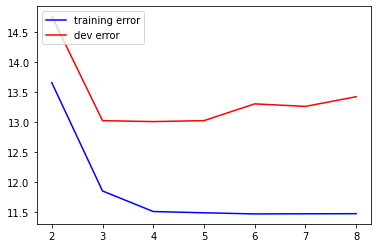

In [124]:
import datetime
import pandas as pd
import numpy as np
import math

num_folds = 5
M = np.arange(2, 9)


def printem3():
    print(train_df_st3.head())
    print(dev_df_st3.head())
    print(test_df_st3.head())
    
def convert2cols3(df):

    df['date'] = pd.to_datetime(df['id'])
    df['month'] = pd.DatetimeIndex(df['date']).month.astype(int)
    df['month'] = np.abs((df['month']-6))
#     df['month'] = np.sin((df['month']-1)*(math.pi/11))
#     sin⁡〖((month-1)*(π/11))  〗
    df = df.drop("date", axis=1)
    df = df.drop('id', axis=1)
    return df

    
# printem()
E_train_k = [0 for i,_ in enumerate(M)]
E_dev_k = [0 for i,_ in enumerate(M)]

for k in range(num_folds):
    train_df_st3 = pd.read_csv("2 Train.csv")
    train_df_st3.columns = ["id", "y"]
    train_df_st3 = train_df_st3.sample(n = len(train_df_st3))
    dev_df_st3 = train_df_st3[100:]
    train_df_st3 = train_df_st3[:100]

    test_df_st3 = pd.read_csv("2 Test.csv")


    train_df_st3 = convert2cols3(train_df_st3)
    dev_df_st3 = convert2cols3(dev_df_st3)
    test_df_st3 = convert2cols3(test_df_st3)
    # printem3()

    import matplotlib.pyplot as plt

    def returnnp(df):
        y = np.array(df.y.values)
        df = df.drop('y', axis=1)
        X = np.array(df.values)
        X = np.c_[np.ones((len(X), 1)), X]
        return X,y

    def degcol(df, deg, col):
        for m in range(2, deg+1):
            nn = col+"^"+str(m)
            df[nn] = df[col]**m
            df[nn] = df[nn]*(10**(-m))
        return df


    train_df  = train_df_st3.copy()
    dev_df = dev_df_st3.copy()

    E_train = []
    E_dev = []
    theta_bestest = []

    for m in M:
        train_df = degcol(train_df, m, "month")
        dev_df = degcol(dev_df, m, "month")

        X_fin_train, y_train = returnnp(train_df)
        X_fin_dev, y_dev = returnnp(dev_df)
        lamb = 0.0000
        theta_best = np.linalg.pinv(X_fin_train).dot(y_train)
        theta_best = np.linalg.inv((lamb*np.identity(m+1)) + X_fin_train.T.dot(X_fin_train)).dot(X_fin_train.T).dot(y_train)
        y_hat_train = X_fin_train.dot(theta_best)
        temp_val_train = sum((y_hat_train-y_train)**2)
        temp_val_train/=len(y_train)
        E_train.append(temp_val_train)
    #     print("train err at m=%s"%(m), temp_val_train)

        y_hat_dev = X_fin_dev.dot(theta_best)
        temp_val_dev = sum((y_hat_dev-y_dev)**2)
        temp_val_dev/=len(y_dev)
        E_dev.append(temp_val_dev)
    
    
        E_train_k[m-min(M)] += temp_val_train
        E_dev_k[m-min(M)] += temp_val_dev
    
    #     print("dev err at m=%s"%(m), temp_val_dev)

#         test_df = test_df_st3.copy()
#         test_df = degcol(test_df, m, "month")
#         test_df = np.array(test_df.values)
#         test_df = np.c_[np.ones((len(test_df), 1)), test_df]

#         y_hat_test = test_df.dot(theta_best)
#         print("For M=%s"%(m), y_hat_test)


#         theta_bestest.append(theta_best)
        
for m in range(len(M)):
    E_train_k[m-2]/=len(M)
    E_dev_k[m-2]/=len(M)
    
plt.plot(M, E_train_k, 'b', label='training error')
plt.plot(M, E_dev_k, 'r', label='dev error')
plt.legend(loc='upper left')
plt.show()

In [96]:
# [[25.89049778]
#  [21.68021333]
#  [ 5.35324447]
#  [-0.76095894]
#  [ 5.75524357]
#  [13.0510935 ]
#  [25.3284498 ]
#  [13.94608273]
#  [-0.76095894]
#  [20.51035558]]

# For M=6 [26.08080717 21.95308343  5.23945812  2.68834284  7.06550509 12.77226687
#  25.50970173 14.64410033 -0.44005744 20.46425116]
# For M=6 [25.90461187 21.73936258  5.29898099  2.76810551  7.15988583 12.86183036
#  25.45112688 14.53857568 -0.75327356 20.51325367]
# For M=6 [26.02170206 21.5945767   5.41981703  2.77817573  6.97025854 13.12294634
#  25.77680121 14.25311443 -0.35232843 20.88351648]

In [102]:
y_set = [25.75042319, 21.72077171,  5.34407673,  1.67449481,  6.25078811, 13.0997886, 25.39160291, 14.16791784, -0.69539859, 20.60821559]
id_set = pd.read_csv("2 Test.csv")
id_set = np.array(id_set['id'].values)
print(id_set)
print(y_set)

ff = np.c_[id_set, y_set]
df = pd.DataFrame(data = ff, columns = ["id", "value"])

# df.to_csv("test_best3.csv", index=False)
df.head(10)

['5/1/10' '4/1/09' '9/1/13' '1/1/06' '2/1/07' '8/1/12' '6/1/14' '3/1/08'
 '12/1/04' '7/1/11']
[25.75042319, 21.72077171, 5.34407673, 1.67449481, 6.25078811, 13.0997886, 25.39160291, 14.16791784, -0.69539859, 20.60821559]


,id,value
0,5/1/10,25.750423
1,4/1/09,21.720772
2,9/1/13,5.344077
3,1/1/06,1.674495
4,2/1/07,6.250788
5,8/1/12,13.099789
6,6/1/14,25.391603
7,3/1/08,14.167918
8,12/1/04,-0.695399
9,7/1/11,20.608216
